# Update a Registered Model

Registering a model with the minimum information.

In [ ]:
import mlflow
from mlflow_for_ml_dev.src.utils.folder_operations import get_project_root

# set mlflow tracking uri
mlflow.set_tracking_uri(uri=(get_project_root() / 'mlruns').as_uri())

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Instantiate a model
rfc = RandomForestClassifier()

registered_model_name = "random-forest-classifier"
with mlflow.start_run(run_name="registering-model") as run:
    # Log the model
    mlflow.sklearn.log_model(sk_model = rfc, artifact_path = rfc.__class__.__name__, registered_model_name=registered_model_name)   

## Adding Model Description

In [3]:
client = mlflow.MlflowClient()

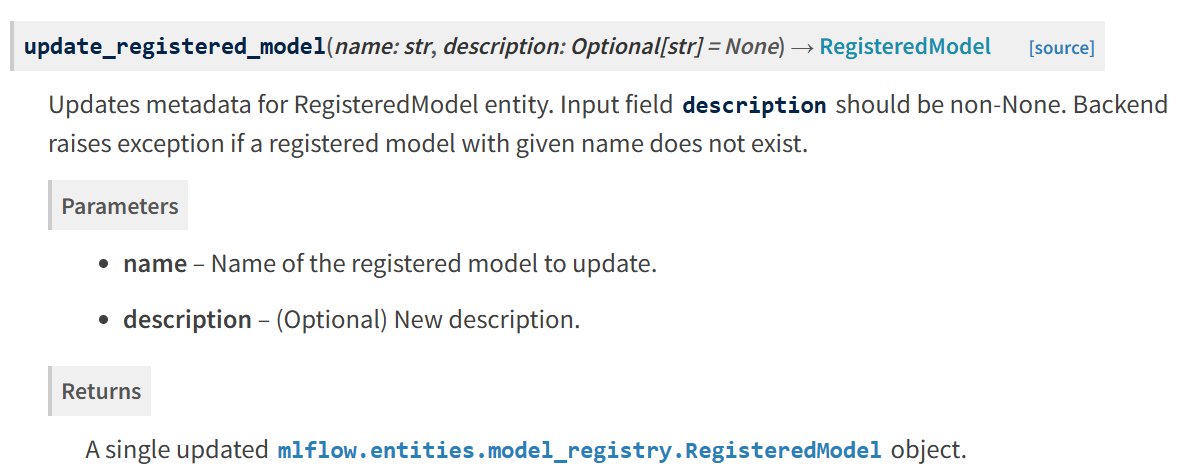

In [ ]:
client.update_registered_model(name = registered_model_name, description="This is a random forest classifier model")

## Adding Model Tags

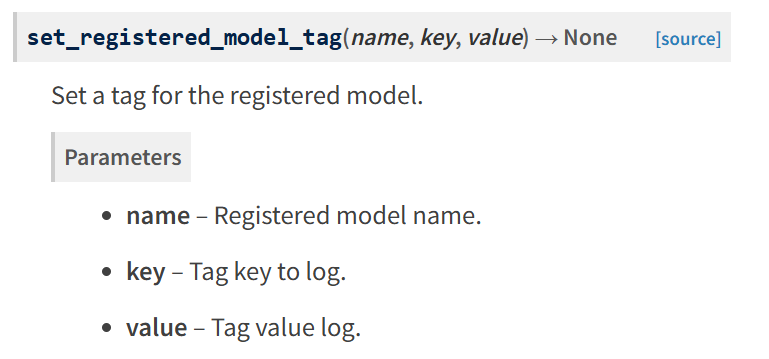

In [5]:
registered_model_tags = {
    "project_name":"UNDEFINED",
    "task":"classification",
    "framework":"sklearn",
}

for key, value in registered_model_tags.items():
    
    client.set_registered_model_tag(name=registered_model_name, key=key, value=value)


## Set Model Alias

In [6]:
model_aliases = ["Champion", "Candidate","Development"]

for model_alias in model_aliases:
    client.set_registered_model_alias(name=registered_model_name, alias = model_alias, version="1")


### Creating a new version

In [ ]:
# Instantiate a model
rfc = RandomForestClassifier()

with mlflow.start_run(run_name="registering-model") as run:
    # Log the model
    mlflow.sklearn.log_model(sk_model = rfc, artifact_path = rfc.__class__.__name__, registered_model_name=registered_model_name)   

In [8]:
# Set the alias to "Champion" for the new version of the model. 
# An alias can only be set to one version of a model at a time.
client.set_registered_model_alias(name=registered_model_name, alias = "Champion", version="2")

## Renaming Registered Model

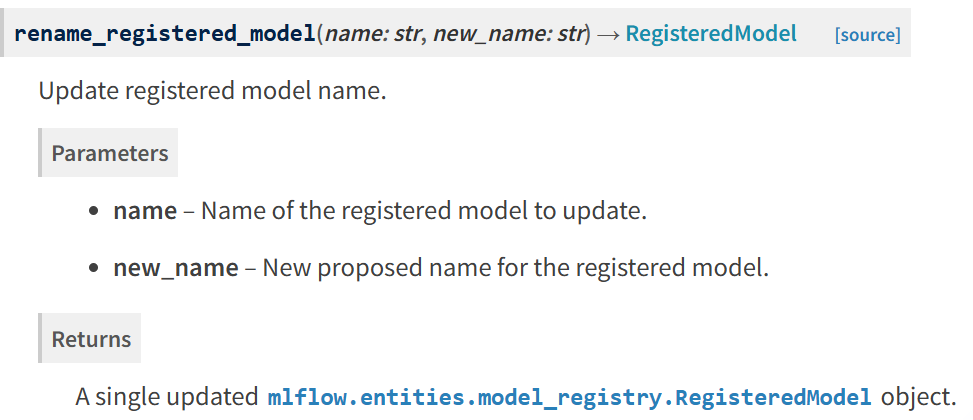

In [9]:
client.rename_registered_model(name = registered_model_name, new_name=registered_model_name + "-v2")

In [10]:
client.rename_registered_model(name = registered_model_name + "-v2", new_name=registered_model_name)

In [11]:
model_aliases = ["Champion", "Candidate","Development"]

for model_alias in model_aliases:
    client.set_registered_model_alias(name=registered_model_name, alias = model_alias, version=1)
client.set_registered_model_alias(name=registered_model_name, alias = "Champion", version=2)